<a href="https://colab.research.google.com/github/vijayvd/vijayvd.github.io/blob/master/_jupyter/Quantile_quantile_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantile-quantile plot
In this post we will look into quantile-quantile plots. Suppose we have samples $x_1, x_2, \ldots, x_n$ and we are interested in seeing if the points follow normal distribution. This could be, for example, to verify if the residuals of linear regression are normally distributed.  One tool is to use quantile-quantile plot (or qqplot). We will look at some examples for this. Let's start by installing and loading libraries.



In [2]:
# install packages
install.packages("data.table")
library(ggplot2)
library(reshape2)
library(data.table)
options(repr.plot.width=11, repr.plot.height=8)
set.seed(0)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘data.table’


The following objects are masked from ‘package:reshape2’:

    dcast, melt




# Experiment 1: 
We will consider a simple experiment where we get samples from standard normal distribution. We plot the sample quantiles against theoretical quantiles. We calculate the sample quantiles by sorting the samples. The smallest value, second smallest value, etc. will be the sample quantiles for 1/n, 2/n, etc. We also compare against the output of standard R function qqnorm and observe a close match and thus helping us understand qqnorm function. 

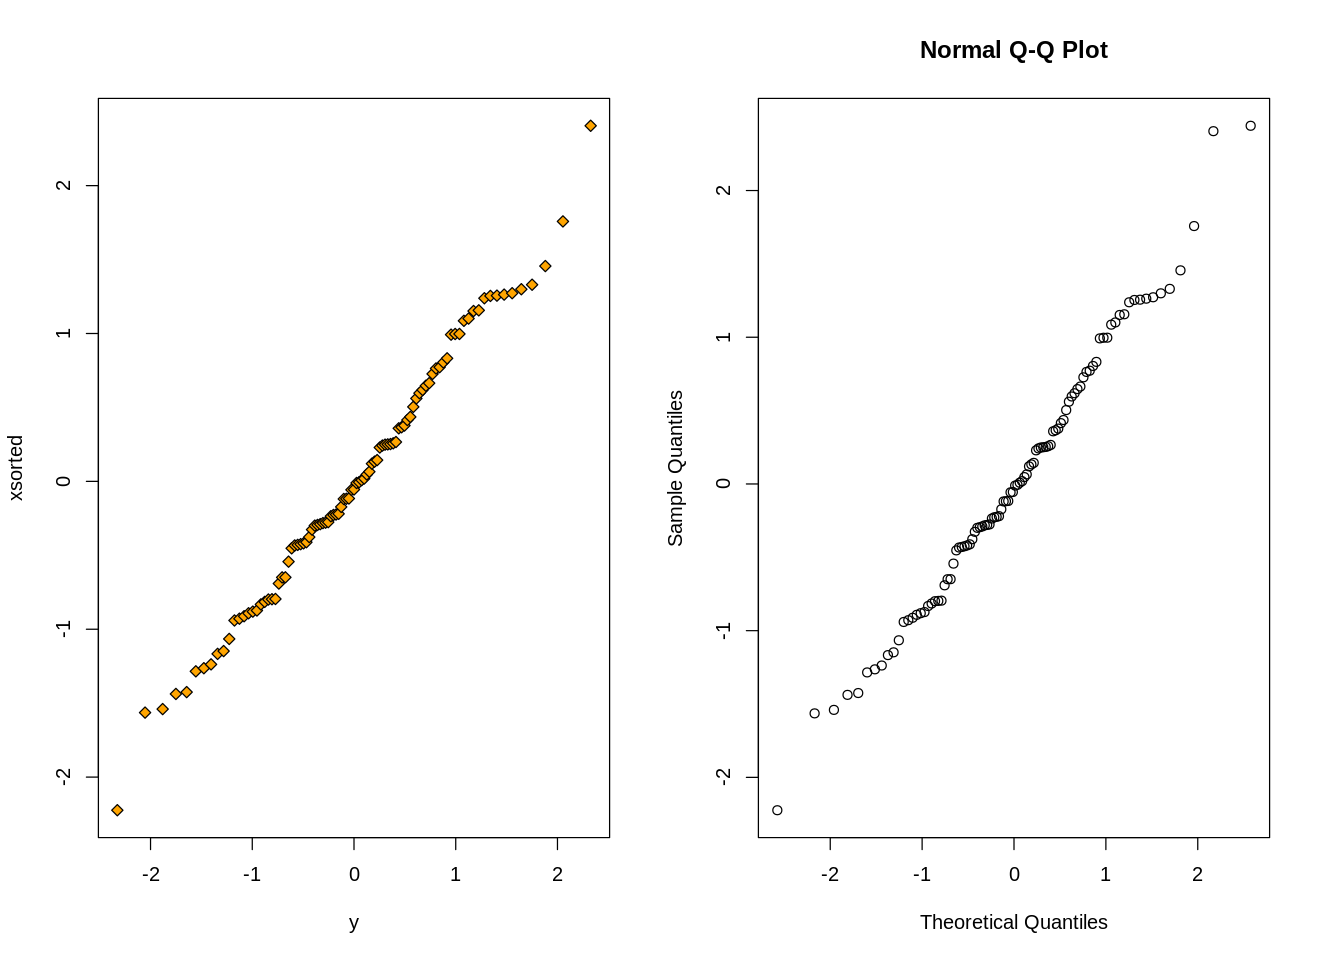

In [3]:
n = 100
x = rnorm(n)
xsorted = sort(x)[1:length(x)-1] # dropping the max value
y <- qnorm(1:(n-1)/n)
par(mfrow = c(1, 2))
plot(y, xsorted, pch = 23, bg='orange', cex = 1)
qqnorm(x)

# Experiment 2
This example will be the same as experiment 1 *except the samples will be with mean = 5 and sd = 10.* It is quite interesting that we can use regression to determine mean and std of the sample using linear regression.

The idea is quite simple. We can think of quantile-quantile plot as parameterized curve $p \in [0, 1]$. On the x-axis we have the $\Phi^{-1}(p)$ -- the inverse CDF of normal distribution. On the y-axis we have the quantiles of the $N(\mu, \sigma)$ plotted given by the inverse CDF $\hat F^{-1}(p)$ -- hat because it is an estimated CDF function. Clearly, we the following relationship: 
$\hat F^{-1}(p) \approx \mu + \sigma \Phi^{-1}(p)$. Hence the regression is able to discover the $\mu, \sigma$ through regression.

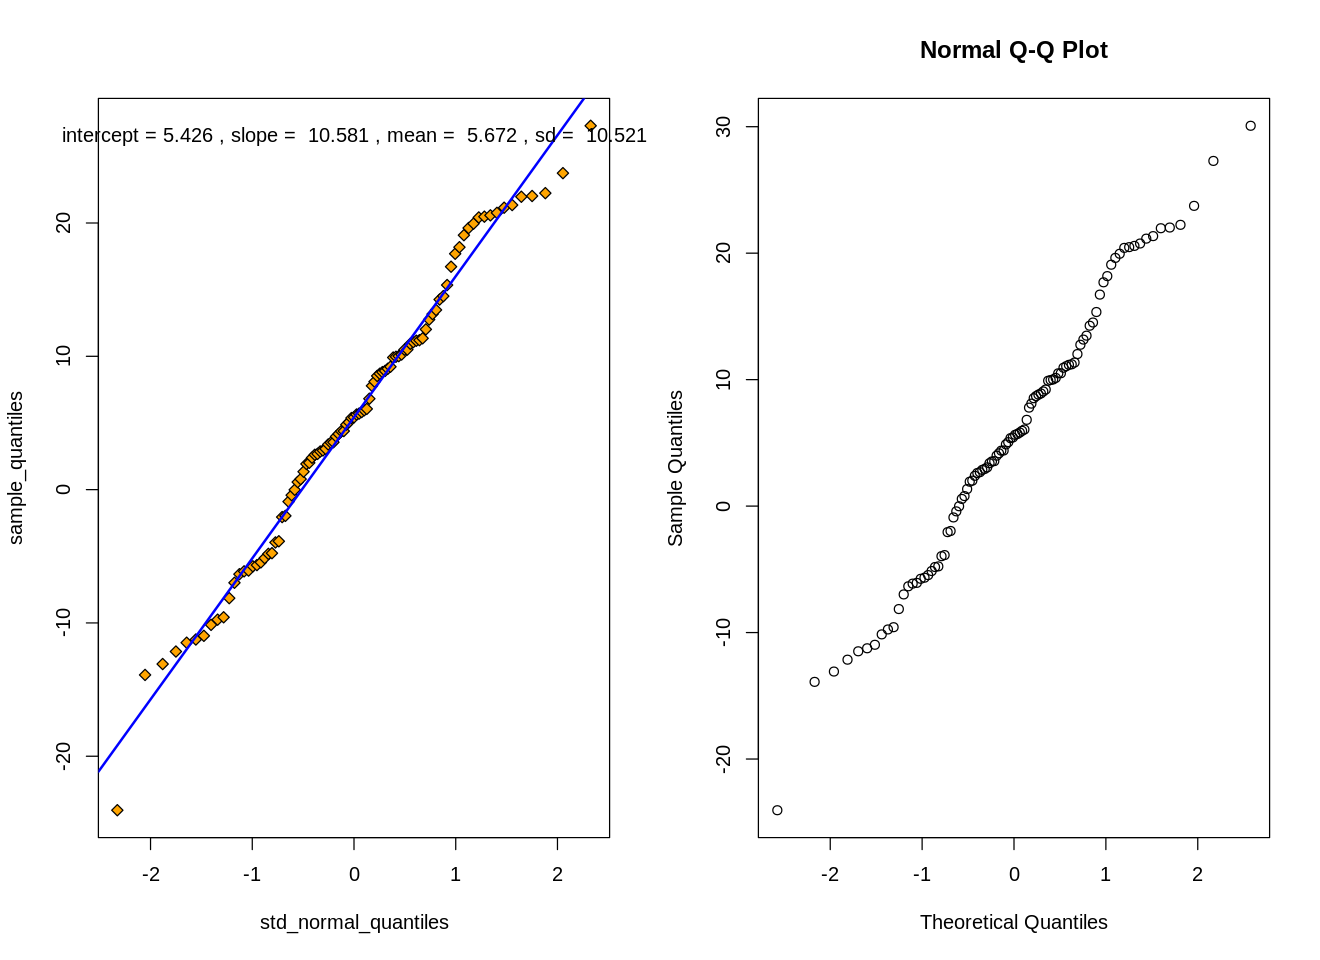

In [6]:
n = 100
x = rnorm(n, mean = 5, sd = 10)
sample_quantiles = sort(x)[1:length(x)-1] # dropping the max value
std_normal_quantiles <- qnorm(1:(n-1)/n)
par(mfrow = c(1, 2))
plot(std_normal_quantiles, sample_quantiles, pch = 23, bg='orange', cex = 1)

lm.fit <- lm(sample_quantiles ~ std_normal_quantiles)
cf <- round(coef(lm.fit), 3)
abline(lm.fit, lwd=2, col='blue')
slope_intercept <- paste("intercept =", cf[1],  ", slope = ", cf[2],
  ", mean = ", round(mean(x), 3), ", sd = ", round(sd(x), 3))
mtext(slope_intercept, 3, line = -2, cex = 1)
qqnorm(x)

# Experiment 3
This time theoretical quantiles will not be the standard normal quantiles but quantiles of the normal distribution with parameters $\hat \mu, \hat \sigma$, which are the parameter estimates based on data. The theoretical quantiles should be a good fit to the empirical quantiles and hence the slope and intercept of linear regression fit should be one and zero respectively.


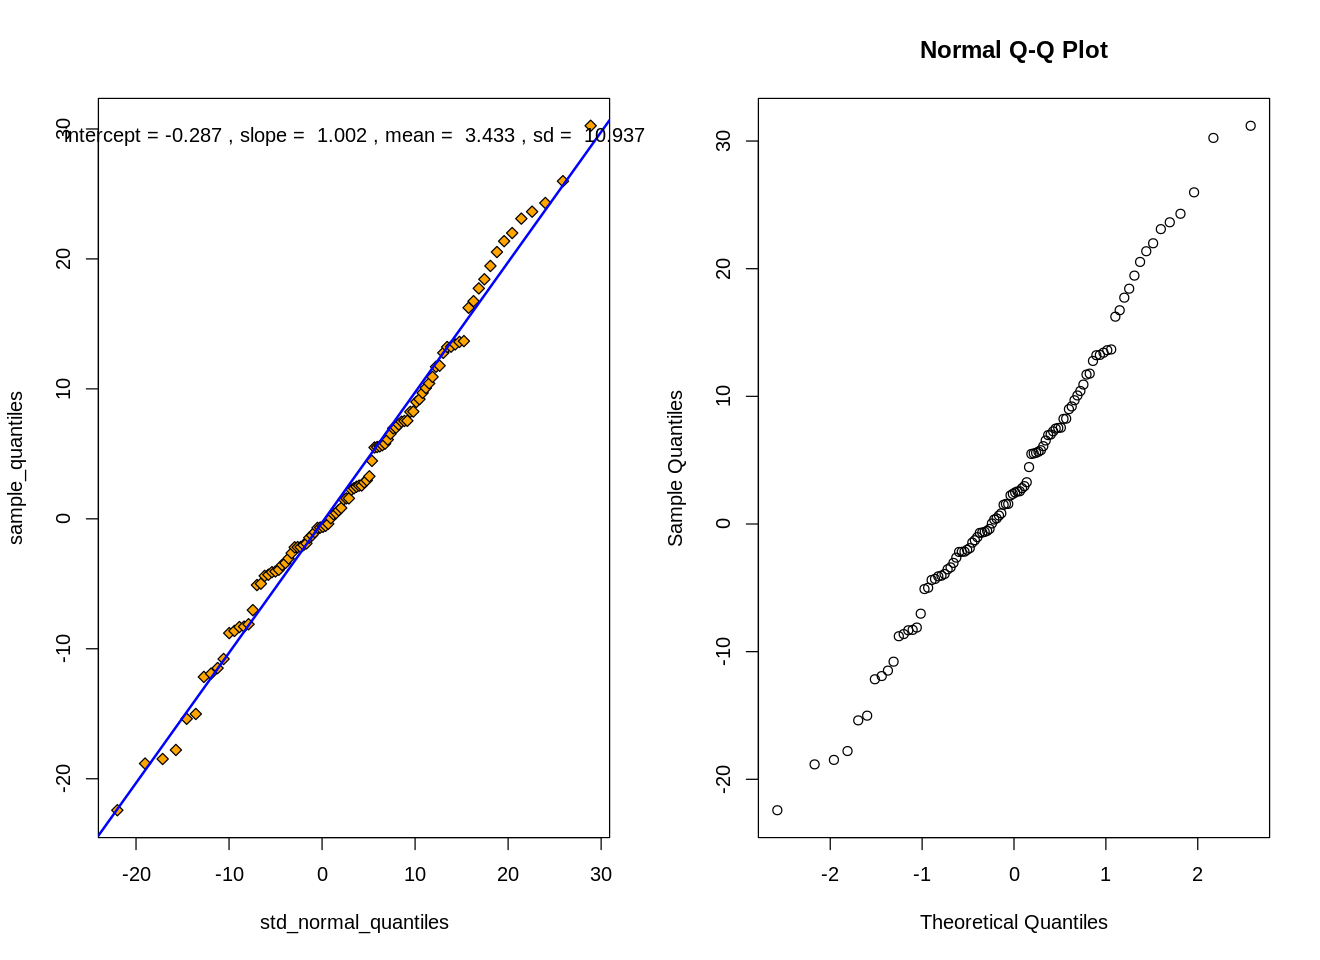

In [0]:
n = 100
x = rnorm(n, mean = 5, sd = 10)
sample_quantiles = sort(x)[1:length(x)-1] # dropping the max value
std_normal_quantiles <- qnorm(1:(n-1)/n, mean = mean(x), sd = sd(x))
par(mfrow = c(1, 2))
plot(std_normal_quantiles, sample_quantiles, pch = 23, bg='orange', cex = 1)
# abline(0, 1, lty=2, lwd=3, col='red')

lm.fit <- lm(sample_quantiles ~ std_normal_quantiles)
cf <- round(coef(lm.fit), 3)
abline(lm.fit, lwd=2, col='blue')
slope_intercept <- paste("intercept =", cf[1],  ", slope = ", cf[2],
  ", mean = ", round(mean(x), 3), ", sd = ", round(sd(x), 3))
mtext(slope_intercept, 3, line = -2, cex = 1)
qqnorm(x)

# Experiment 4
Suppose we have two distributions with one distribution more spread than the other. For example standard normal vs. t. The quantile-quantile plot shows that in the center the normal and t-distribution match well, however, in the tails there is a difference. In the tails as we go further out, the quantiles from t-distribution will be much larger in absolute value compared to quantiles from normal distribution. 

Warning message in melt(df):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(df). In the next version, this warning will become an error.”
No id variables; using all as measure variables



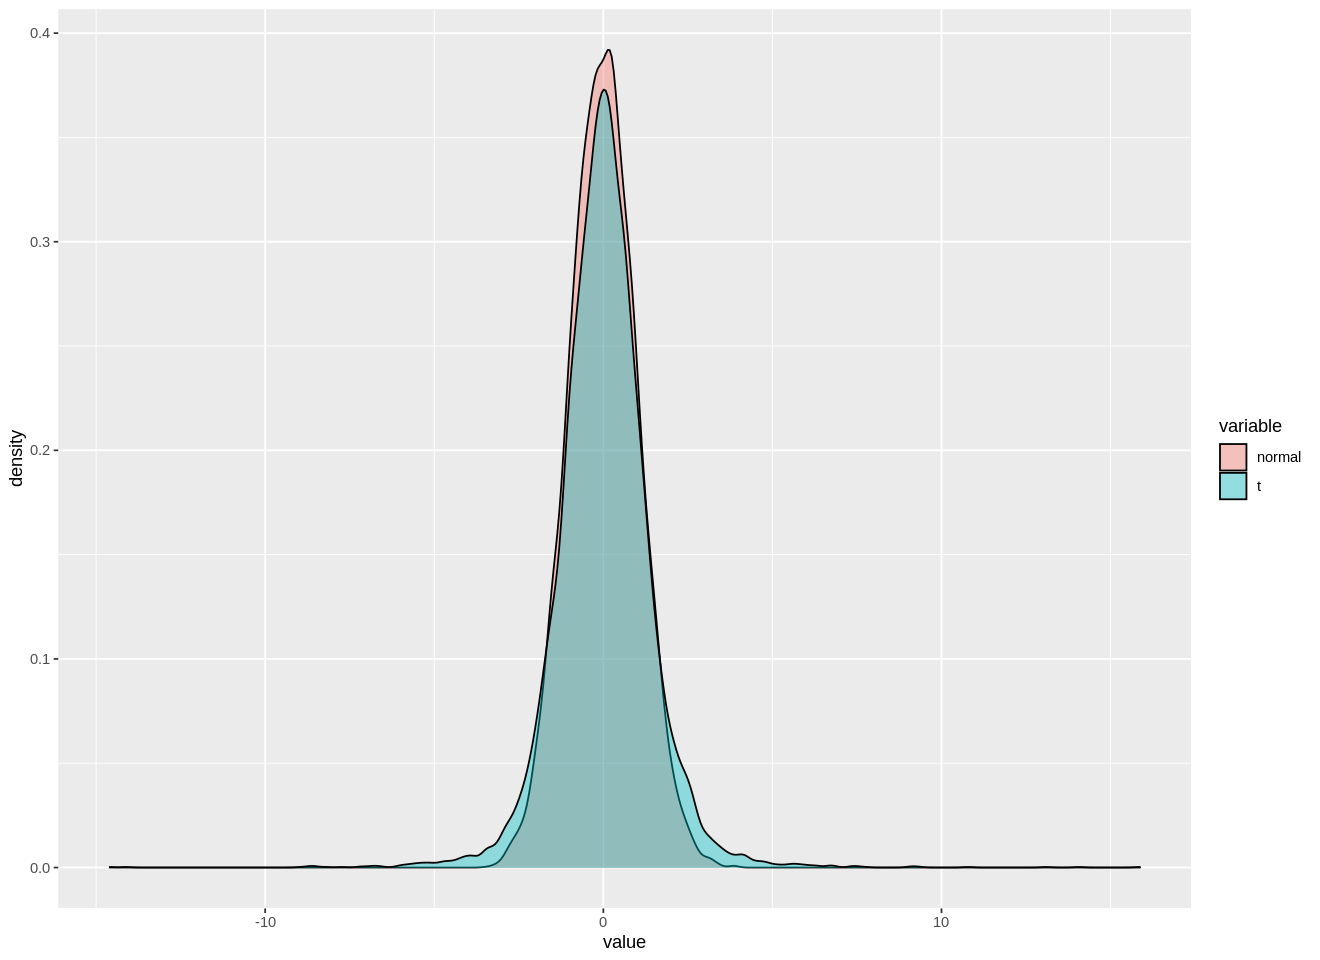

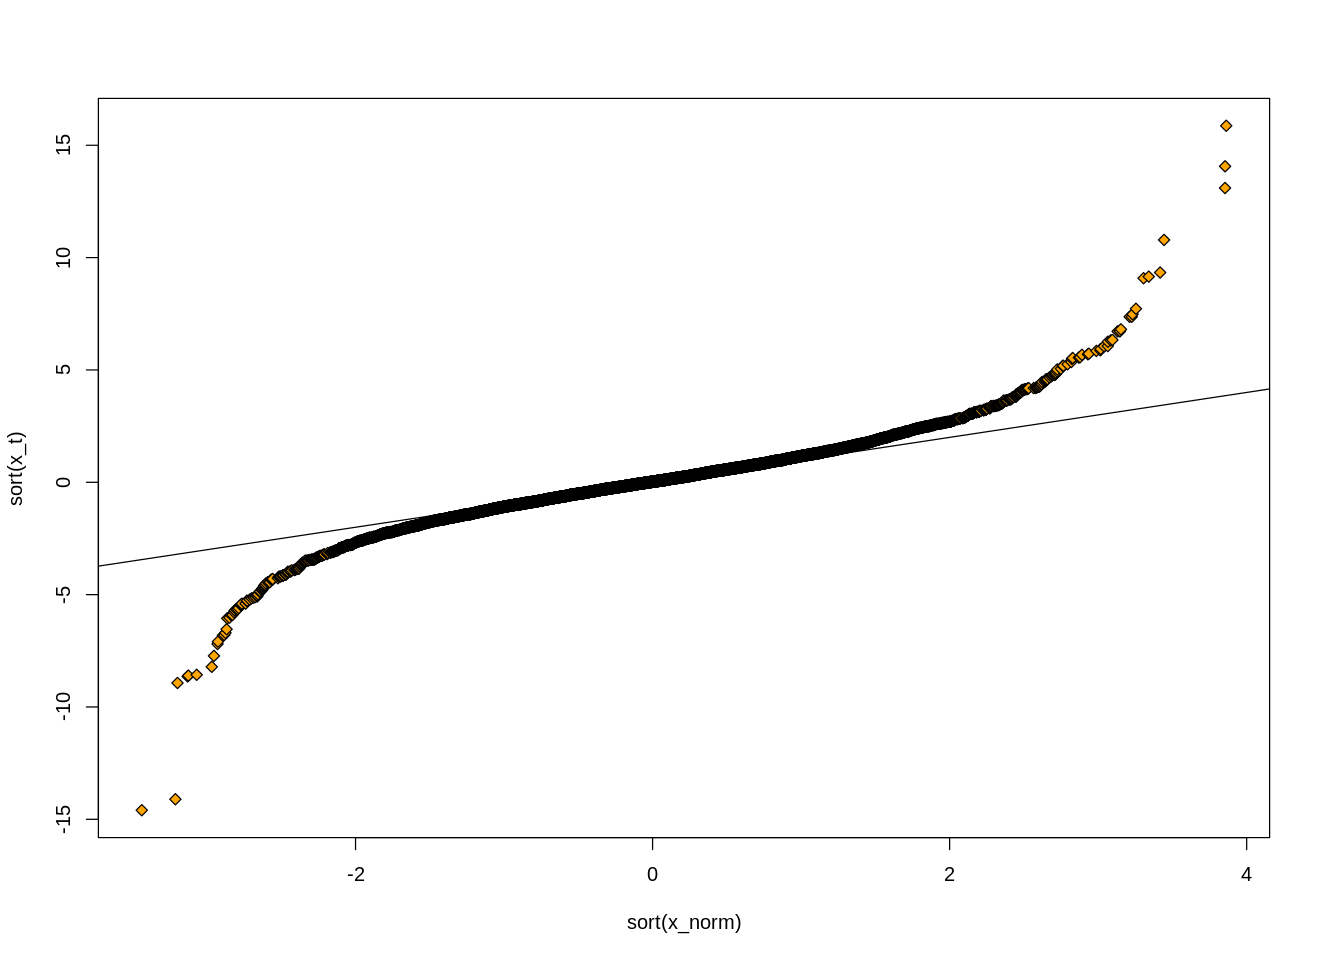

In [0]:
n = 10000
x_norm = rnorm(n)
x_t = rt(n, df=4)
df <- data.frame(normal = x_norm, t = x_t)
df <- melt(df)
ggplot(df, aes(x=value, fill=variable)) + geom_density(alpha=0.4)
plot(sort(x_norm), sort(x_t) , pch = 23, bg='orange')
abline(0, 1) 